<a href="https://colab.research.google.com/github/Ekta-Shah/ML-practise/blob/master/Finance_Loan_Ekta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
+import pandas as pd

In [0]:
import numpy as np

In [0]:
#Using file from Google Drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.7MB/s 


In [0]:
link = "https://drive.google.com/open?id=1DynCfU4LHpNT4U_hxFTm4f_kTwgTkMxT"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('loan.csv')  
df = pd.read_csv('loan.csv')

1DynCfU4LHpNT4U_hxFTm4f_kTwgTkMxT


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [0]:
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [0]:
newdf=df.drop(["inq_last_12m","emp_title","zip_code","url","total_cu_tl","inq_fi","all_util","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","annual_inc_joint","dti_joint","verification_status_joint","mths_since_last_major_derog","mths_since_last_delinq","mths_since_last_record","desc"],1)

In [0]:
newdf.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     44825
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                            152
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
open_acc                          29
pub_rec                           29
revol_bal                          0
r

In [0]:
newdf=newdf.drop(["next_pymnt_d","issue_d","last_pymnt_d","last_credit_pull_d","earliest_cr_line","title","id","member_id"],1)

In [0]:
numerical_cols=newdf.select_dtypes(include=np.number)
numerical_cols.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,...,0.00,0.00,0.00,171.62,0.0,1.0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,...,0.00,117.08,1.11,119.66,0.0,1.0,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,...,0.00,0.00,0.00,649.91,0.0,1.0,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,16.97,0.00,0.00,357.48,0.0,1.0,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,0.00,0.00,0.00,67.79,0.0,1.0,0.0,NaN,NaN,NaN


In [0]:
categorical_cols=newdf.select_dtypes(exclude=np.number)

In [0]:
categorical_cols.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,AZ,f,INDIVIDUAL
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,GA,f,INDIVIDUAL
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,IL,f,INDIVIDUAL
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,CA,f,INDIVIDUAL
4,60 months,B,B5,1 year,RENT,Source Verified,Current,n,other,OR,f,INDIVIDUAL


In [0]:
numerical_cols.isnull().sum()
num_X=["annual_inc","acc_now_delinq","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_util","total_acc","collections_12_mths_ex_med","tot_coll_amt","tot_cur_bal","total_rev_hi_lim"]

In [0]:
categorical_cols.isnull().sum()

term                       0
grade                      0
sub_grade                  0
emp_length             44825
home_ownership             0
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64

In [0]:
def clean_numerical(column):
    mean=newdf[newdf[column]!=np.nan][column].astype(float).mean()
    newdf[column] = newdf[column].replace(np.nan,str(mean)).astype(float)
    return newdf

In [0]:
for i in num_X:
  clean_numerical(i)


In [0]:
newdf.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    44825
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                 

In [0]:
categorical_cols.isnull().sum()

term                       0
grade                      0
sub_grade                  0
emp_length             44825
home_ownership             0
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64

In [0]:
def clean_categorical(column):
    mode=newdf[newdf[column]!=np.nan][column].mode()
    newdf[column] = newdf[column].replace(np.nan,str(mode))
    return newdf

In [0]:
newdf.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    44825
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                 

In [0]:
#Encoding
#pd.get_dummies(newdf)
newdf["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [0]:
categorical_cols.isnull().sum()

term                       0
grade                      0
sub_grade                  0
emp_length             44825
home_ownership             0
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64

In [0]:
clean_categorical("emp_length")
newdf["initial_list_status"].value_counts()

f    456848
w    430531
Name: initial_list_status, dtype: int64

In [0]:
newdf["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [0]:
newdf1=newdf.copy()
newdf1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.00,0.00,171.62,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,117.08,1.11,119.66,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.00,0.00,649.91,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.00,0.00,357.48,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,0.00,0.00,67.79,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045


In [0]:
newdf=newdf[newdf.loan_status!="Current"]


In [0]:
newdf=newdf[newdf.loan_status!="Late (31-120 days)"]

In [0]:
newdf=newdf[newdf.loan_status!="Issued"]

In [0]:
newdf=newdf[newdf.loan_status!="In Grace Period"]

In [0]:
newdf=newdf[newdf.loan_status!="Late (16-30 days)"]

In [0]:
newdf.loc[newdf.loan_status == 'Charged Off', 'loan_outcome'] = 1 
newdf.loc[newdf.loan_status == 'Default', 'loan_outcome'] = 1
newdf.loc[newdf.loan_status == 'Fully Paid', 'loan_outcome'] = 0
newdf.loc[newdf.loan_status == 'Does not meet the credit policy. Status:Fully Paid','loan_outcome'] = 0
newdf.loc[newdf.loan_status == 'Does not meet the credit policy. Status:Charged Off','loan_outcome'] = 1
newdf["loan_outcome"].value_counts()

0.0    209711
1.0     47228
Name: loan_outcome, dtype: int64

In [0]:
newdf["home_ownership"].value_counts()

MORTGAGE    126598
RENT        107831
OWN          22282
OTHER          179
NONE            48
ANY              1
Name: home_ownership, dtype: int64

In [0]:
newdf.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [0]:
numerical_columns=newdf.select_dtypes(include=np.number)
numerical_columns.head()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_names=list(numerical_columns)
numerical_columns=scaler.fit_transform(numerical_columns)
numerical_columns
numerical_columns=pd.DataFrame(numerical_columns,columns=col_names)
numerical_columns.head()
type(numerical_columns)

pandas.core.frame.DataFrame

In [0]:
categorical_columns1=newdf.select_dtypes(exclude=np.number)
categorical_columns1.head()
categorical_columns1.shape


(256939, 12)

In [0]:
X_cat=pd.get_dummies(categorical_columns1)
X_cat.head()
type(X_cat)


pandas.core.frame.DataFrame

In [0]:
X_cat.reset_index(drop=True, inplace=True)


In [0]:
numerical_columns.reset_index(drop=True, inplace=True)

In [0]:
X1=pd.concat([numerical_columns,X_cat],1)
X1.shape
X1.to_csv()
from google.colab import files

X1.to_csv('loanclub.csv')
files.download('loanclub.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 57466, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
X=X1.drop(["loan_outcome"],1)
y=X1["loan_outcome"]
X.dtypes
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,0.130435,0.130435,0.142143,0.225180,0.104479,0.002539,0.483899,0.0,0.030303,0.039474,...,0,0,0,0,0,0,1,0,1,0
1,0.057971,0.057971,0.071429,0.420363,0.031344,0.003229,0.017501,0.0,0.151515,0.039474,...,0,0,0,0,0,0,1,0,1,0
2,0.055072,0.055072,0.068571,0.449514,0.048733,0.001190,0.152608,0.0,0.060606,0.026316,...,0,0,0,0,0,0,1,0,1,0
3,0.275362,0.275362,0.285714,0.345163,0.229711,0.005434,0.350018,0.0,0.030303,0.131579,...,0,0,0,0,0,0,1,0,1,0
4,0.130435,0.130435,0.142857,0.108999,0.099929,0.003918,0.196010,0.0,0.090909,0.118421,...,0,0,0,0,0,0,1,0,1,0


In [0]:

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y,test_size=0.2,random_state=42)
X_train.head()
X_test.head()
y_train

152706    0.0
233184    0.0
252466    0.0
156160    0.0
177212    1.0
241159    0.0
199375    1.0
110266    0.0
66435     1.0
161516    0.0
237958    0.0
150178    0.0
70666     0.0
65798     0.0
143415    0.0
86115     0.0
35811     0.0
27964     0.0
154425    0.0
41259     1.0
97126     0.0
101699    0.0
250782    0.0
10144     0.0
10672     1.0
225966    1.0
51748     0.0
46063     0.0
229059    0.0
77862     0.0
         ... 
214176    0.0
235796    0.0
103355    0.0
5311      0.0
199041    0.0
252709    0.0
64925     0.0
194027    0.0
59735     0.0
769       1.0
64820     0.0
67221     1.0
41090     0.0
16023     0.0
191335    0.0
175203    0.0
126324    0.0
112727    1.0
87498     0.0
168266    0.0
213458    1.0
137337    0.0
54886     0.0
207892    0.0
110268    0.0
119879    0.0
103694    1.0
131932    0.0
146867    1.0
121958    0.0
Name: loan_outcome, Length: 205551, dtype: float64

In [0]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [0]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred=logreg.predict(X_test)

In [0]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
matrix=cnf_matrix

Confusion_matrix [[41928     0]
 [    0  9460]]


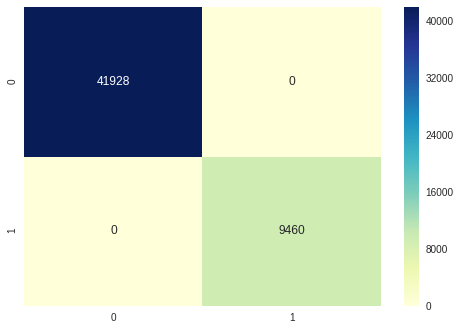

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Confusion_matrix",matrix)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [0]:
from sklearn.feature_selection import RFE

In [0]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [0]:
cross_val_score(logreg,X,y,cv=4,scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.97012532, 1.        , 1.        , 1.        ])

In [0]:
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}

In [0]:
logreg_gridcv.score


NameError: ignored

In [0]:
rfe = RFE(logreg, 5)

In [0]:
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [0]:
X1.head()
y1.head()

0    0.0
1    1.0
2    0.0
3    0.0
5    0.0
Name: loan_outcome, dtype: float64

In [0]:
X.shape

(256939, 166)

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X1, y1)



In [0]:
1

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
list_sc=list(fit.scores_)


[1.211e+02 1.200e+02 1.029e+02 1.419e+03 4.936e+01 5.016e+00 2.081e+02
 5.947e+00 4.549e+01 8.371e-01 2.787e-01 2.629e-02 3.043e+01 1.075e+01
 1.793e+03 1.793e+03 3.828e+03 3.826e+03 9.481e+03 5.011e+01 6.498e+02
 5.398e+03 2.747e+03 8.739e+03 3.041e+00       nan 2.202e+00 8.910e-02
 1.769e+01 6.459e+00 2.097e+05 1.316e+03 4.602e+03 4.132e+03 1.594e+03
 9.298e+01 1.819e+03 2.921e+03 2.240e+03 7.432e+02 9.163e+02 7.876e+02
 7.778e+02 9.364e+02 8.075e+02 5.271e+02 5.224e+02 3.909e+02 2.094e+02
 9.793e+01 2.031e+01 4.022e-01 3.871e+01 9.090e+01 1.603e+02 2.233e+02
 3.381e+02 3.164e+02 5.601e+02 4.829e+02 4.324e+02 6.909e+02 5.942e+02
 6.317e+02 6.342e+02 4.339e+02 3.919e+02 5.496e+02 4.715e+02 4.573e+02
 2.823e+02 1.751e+02 1.434e+02 5.214e+01 9.910e+01 3.977e+02 3.406e-01
 3.327e+01 1.210e+01 3.479e+00 6.839e+00 4.510e-01 1.168e+00 3.347e+00
 1.274e+00 2.851e+00 3.749e+00 2.252e-01 3.413e+02 9.403e-02 9.678e-01
 2.335e+00 3.721e+02 7.791e+02 2.617e+01 5.049e+02 3.506e-06 4.504e-01
 8.112

In [0]:
features = fit.transform(X1)
features
# Summarize selected features
print(features[0:5,:])
X1.columns

[[0.143 0.    0.005 0.   ]
 [0.013 0.003 0.003 1.   ]
 [0.069 0.    0.018 0.   ]
 [0.286 0.    0.01  0.   ]
 [0.143 0.    0.004 0.   ]]


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc',
       ...
       'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI',
       'addr_state_WV', 'addr_state_WY', 'initial_list_status_f',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT'],
      dtype='object', length=167)

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
y_train.shape

(154163,)

In [0]:
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0)

In [0]:
sfs=sfs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:  1.9min finished

[2019-02-27 08:46:21] Features: 1/5 -- score: 0.9980021146448889[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:  5.1min finished

[2019-02-27 08:51:26] Features: 2/5 -- score: 0.9996367481172526[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]

In [0]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 18, 23, 76]


In [0]:
X1.columns[feat_cols]

Index(['funded_amnt', 'funded_amnt_inv', 'total_rec_prncp', 'last_pymnt_amnt',
       'emp_length_1 year'],
      dtype='object')

In [0]:
clf = RandomForestClassifier(random_state=42, max_depth=4)


In [0]:
clf.fit(X_train[X1.columns[feat_cols]], y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
y_train_pred = clf.predict(X_train[X1.columns[feat_cols]])

In [0]:
from sklearn.metrics import accuracy_score as acc
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test[X1.columns[feat_cols]])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.986
Testing accuracy on selected features: 0.985


In [0]:
sfs2= sfs(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0)

In [0]:
sfs_model2=sfs2.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:  1.2min finished

[2019-02-27 09:26:06] Features: 1/10 -- score: 0.9129492809558714[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:  1.3min finished

[2019-02-27 09:27:21] Features: 2/10 -- score: 0.9426321490889513[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed:  2.3min finished

[2019-02-27 09:29:39] Features: 3/10 -- score: 0.9821876844638467[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [0]:
feat_cols = list(sfs2.k_feature_idx_)
print(feat_cols)

[1, 2, 16, 17, 18, 21, 25, 86, 95, 164]


In [0]:
X1.columns[feat_cols]

Index(['funded_amnt', 'funded_amnt_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'recoveries', 'policy_code', 'emp_length_< 1 year',
       'verification_status_Verified', 'initial_list_status_w'],
      dtype='object')

In [0]:
y_train_pred = clf.predict(X_train[X1.columns[feat_cols]])

In [0]:
from sklearn.metrics import accuracy_score as acc
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test[X1.columns[feat_cols]])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.985
Testing accuracy on selected features: 0.985
